## Lab 3 GNOD Final_Spotify

In [1]:
#spotipy_client_id and spotipy_secret_client added to environment variables 

In [2]:
#!pip install spotipy

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D

In [4]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

In [5]:
#''' What we need:
# 1) Get Playlist [x]
# 2) Get artist name from each song of the playlist
# 3) Get all albums from each of the artists
# 4) Get all songs from each of the albums
 #5) Get URI's for all the songs

In [6]:
## One way of getting a long playlist:
# Get playlist
# List of artists from the playlist
                        
# For artist in artists_in_play_list:
    #results = sp.search(q="artist:" + artist, type="track", limit=10) # get 10 tracks for each artist

# Audio features - sp.audio_features()


In [7]:
# Playlist
playlist = sp.user_playlist_tracks("spotify", "0BUNSGihi2mrhQu3fPcVim")

In [8]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/0BUNSGihi2mrhQu3fPcVim/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2013-05-28T17:17:03Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/darkspy72'},
    'href': 'https://api.spotify.com/v1/users/darkspy72',
    'id': 'darkspy72',
    'type': 'user',
    'uri': 'spotify:user:darkspy72'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0czJqnJDu3vWrLHmsbLunu'},
       'href': 'https://api.spotify.com/v1/artists/0czJqnJDu3vWrLHmsbLunu',
       'id': '0czJqnJDu3vWrLHmsbLunu',
       'name': 'The Muppets',
       'type': 'artist',
       'uri': 'spotify:artist:0czJqnJDu3vWrLHmsbLunu'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',

In [9]:
playlist["total"]

815

In [10]:
playlist['items'][0]['track']

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0czJqnJDu3vWrLHmsbLunu'},
    'href': 'https://api.spotify.com/v1/artists/0czJqnJDu3vWrLHmsbLunu',
    'id': '0czJqnJDu3vWrLHmsbLunu',
    'name': 'The Muppets',
    'type': 'artist',
    'uri': 'spotify:artist:0czJqnJDu3vWrLHmsbLunu'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR',
   'HT',


In [11]:
playlist['items'][0]['track']['artists'][0]['name']

'The Muppets'

In [12]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [13]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [14]:
playlist = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")  #get playlist tracks, takes some time
len(playlist )


815

In [16]:
len(playlist['items'])

TypeError: list indices must be integers or slices, not str

In [17]:
#uris

In [18]:
def uris(playlist):
    uris = [playlist[i]['track']['uri'] for i in range(len(playlist))]   
    return uris
all_uris = uris(playlist)

In [19]:
playlist_all_uris = pd.DataFrame(all_uris, columns=['uri'])     
playlist_all_uris.shape

(815, 1)

In [20]:
playlist_all_uris

,uri
0,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,spotify:track:25U7raB3ZSszayTYClh4hF
2,spotify:track:04cdEVbQPb8BJb7593e5fO
3,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,spotify:track:2pp3RfqX5cb1BAnmNi4Nej
...,...
810,spotify:track:6B89ADIwxCw60PHZN6Kdp4
811,spotify:track:7nXXIXFSyDDPlfzCW9bdAa
812,spotify:track:536L9C0N7vhYdibCJx3cI2
813,spotify:track:2eTjkXxxssJeR3u586CMkI


In [21]:
def all_artists(playlist):
    artist = [playlist[i]['track']['artists'][0]['name'] for i in range(len(playlist))]    #artists
    return artist  
all_artists = all_artists(playlist)

In [22]:
playlist_all_artists = pd.DataFrame(all_artists, columns=['artist'])         
playlist_all_artists.shape

(815, 1)

In [23]:
playlist_all_artists

,artist
0,The Muppets
1,Israel Kamakawiwo'ole
2,Joey Ramone
3,Asaf Avidan & the Mojos
4,Louis Armstrong
...,...
810,Garfunkel and Oates
811,Shiny Toy Guns
812,Gordon Lightfoot
813,Blackmill


In [24]:
def all_track_names(playlist):
    names = [playlist[i]['track']['name'] for i in range(len(playlist))]     
    return names
all_track_names = all_track_names(playlist)

In [25]:
df_all_song_names = pd.DataFrame(all_track_names, columns=['song'])          #tracks data frame
df_all_song_names.shape

(815, 1)

In [26]:
df_all_song_names

,song
0,Rainbow Connection
1,Somewhere Over The Rainbow_What A Wonderful World
2,What a Wonderful World
3,One Day / Reckoning Song (Wankelmut Remix) [Ra...
4,What A Wonderful World - Single Version
...,...
810,The Loophole
811,Major Tom (Coming Home) - Adam K & Soha Radio ...
812,The Wreck of the Edmund Fitzgerald
813,Fortune Soul


In [27]:
features = [sp.audio_features(i) for i in (all_uris)]   

In [28]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [29]:
features_new = flatten(features) 
features_new[0]

{'danceability': 0.526,
 'energy': 0.413,
 'key': 9,
 'loudness': -7.674,
 'mode': 1,
 'speechiness': 0.0278,
 'acousticness': 0.428,
 'instrumentalness': 0,
 'liveness': 0.126,
 'valence': 0.211,
 'tempo': 115.936,
 'type': 'audio_features',
 'id': '1SJ4ycWow4yz6z4oFz8NAG',
 'uri': 'spotify:track:1SJ4ycWow4yz6z4oFz8NAG',
 'track_href': 'https://api.spotify.com/v1/tracks/1SJ4ycWow4yz6z4oFz8NAG',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SJ4ycWow4yz6z4oFz8NAG',
 'duration_ms': 188933,
 'time_signature': 3}

In [30]:
danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]
duration_ms = [features_new[i]['duration_ms'] for i in range(len(features_new))]
time_signature = [features_new[i]['time_signature'] for i in range(len(features_new))]

In [31]:
playlist_all_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo, 'duration_ms':duration_ms, 'time_signature':time_signature})
playlist_all_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4
811,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4
812,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3
813,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4


In [32]:
playlist_complete = pd.concat([playlist_all_artists, df_all_song_names, playlist_all_uris, playlist_all_features], axis=1)

In [33]:
playlist_complete.shape

(815, 16)

In [34]:
playlist_complete.columns

Index(['artist', 'song', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [35]:
playlist_complete

,artist,song,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4


In [36]:
playlist_categoricals= playlist_complete.drop (['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'], axis=1)
playlist_categoricals

,artist,song,uri
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej
...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI


In [37]:
# drop the non-numericals prior to feeding the ML algorythm
# playlist_all_features

scaler= StandardScaler().fit(playlist_all_features)
X_prep = scaler.transform(playlist_all_features)


In [38]:
playlist_all_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [39]:
playlist_all_features.shape

(815, 13)

In [40]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [41]:
num_clusters = kmeans.predict(X_prep)                   
pd.Series(num_clusters).value_counts().sort_index()

0    206
1    398
2    211
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

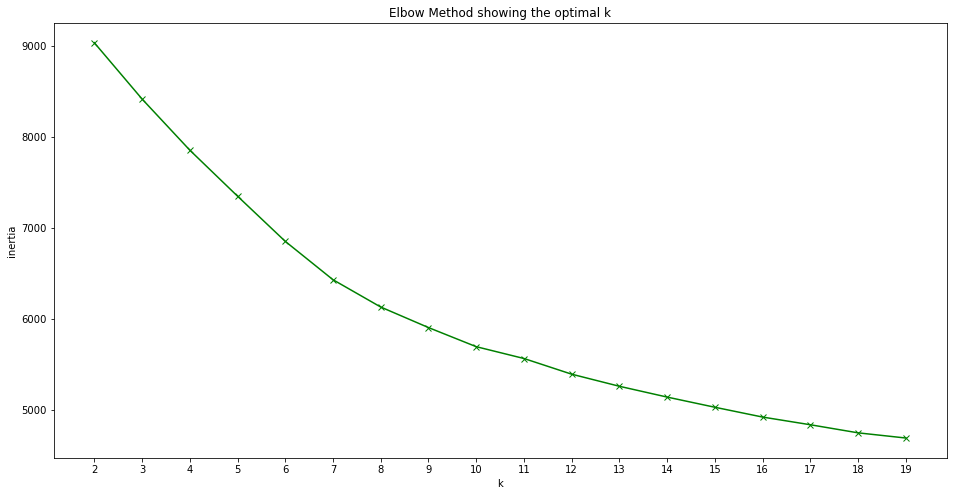

In [42]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'gx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

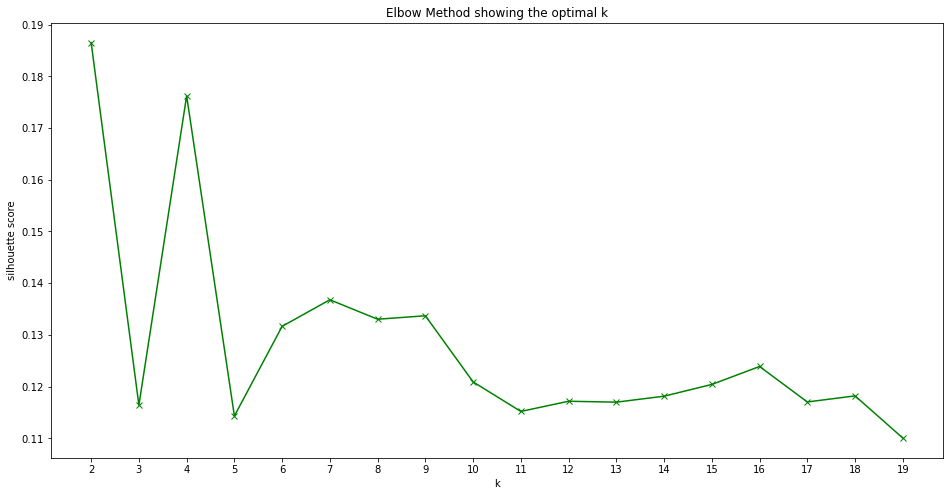

In [43]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))                        #silhouette score is prediction, maximized for 3 clusters, higher score is better


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'gx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [44]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=50,  
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)

print(kmeans.inertia_)


7781.785129493341


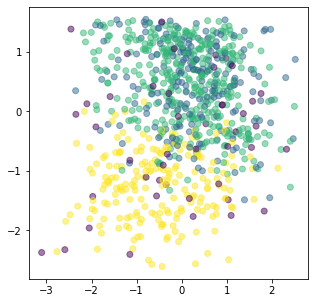

In [45]:
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D

kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X_prep)
pred = kmeans.predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()


In [46]:
playlist_complete['num_clusters'] = num_clusters
playlist_complete

,artist,song,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_clusters
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,188933,3,2
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,308027,4,2
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,143360,4,1
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,212360,4,0
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,140333,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,278408,4,1
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,247273,4,0
812,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,spotify:track:536L9C0N7vhYdibCJx3cI2,0.308,0.376,4,-15.240,1,0.0626,0.11600,0.000003,0.1660,0.158,186.047,389280,3,2
813,Blackmill,Fortune Soul,spotify:track:2eTjkXxxssJeR3u586CMkI,0.536,0.642,5,-6.479,0,0.0434,0.06400,0.356000,0.1050,0.193,138.914,201156,4,0


In [47]:
playlist_complete.isna().sum()

artist              0
song                0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
num_clusters        0
dtype: int64

In [48]:
top100 = pd.read_csv('C:\\Users\\edith\\Documents\\Ironhack\\Labs\\week6\\day1\\top100.csv').drop(['Unnamed: 0'],axis=1)

In [49]:
top100

,artist,title
0,Taylor Swift,All Too Well (Taylor's Version)
1,Adele,Easy On Me
2,The Kid LAROI & Justin Bieber,Stay
3,Lil Nas X & Jack Harlow,Industry Baby
4,Silk Sonic (Bruno Mars & Anderson .Paak),Smokin Out The Window
...,...,...
95,Swedish House Mafia & The Weeknd,Moth To A Flame
96,Cody Johnson,'Til You Can't
97,Doja Cat,Woman
98,The Weeknd,Take My Breath


In [ ]:
#--------------------------------------------------------gnod randomizer------------------------------------------------------------------------------------------------------
run = 'Y'
while run == 'Y':
    new_song = input("Enter a song: ")
    new_artist = input("Enter an artist: ")
    title = new_song

    if (new_song in top100['title'].values) & (new_artist in top100['artist'].values):
        while title == new_song :
            rand = randint(1, len(top100))
            title = top100['title'][rand]
            artist = top100['artist'][rand]
        print('This song is LIT! You might be intereted in this song: ', title,' by ',artist)   
    else:
        #try:
            new_search = sp.search(q=new_song + ' ' + new_artist, type="track", market="US", limit=1)     #andi suggested to do US search only
            #get features
            features_new = sp.audio_features(new_search['tracks']['items'][0]['uri'])
            #create features dataframe, convert to numeric 
            features_df = pd.DataFrame(features_new) 
            features_df_numeric = features_df.drop(['type','id','uri','track_href','analysis_url','duration_ms','time_signature'], axis=1)
            #feed features_numeric into the scaler
            song_prepare = scaler.transform(features_df_numeric)
            cluster_predict = kmeans.predict(song_prepare)[0]
            picked = my_songs_list[my_songs_list['cluster'] == cluster_predict].sample(1)   #picked song in cluster 
            #assign title and artist, values indexed at zero, without this sample(1) will not work
            picked_title = picked['name'].values[0]
            picked_artist = picked['artist'].values[0]
            print('The GNOD algorythm picked this song for you : ', picked_title,' by ', picked_artist)
        #except:
            #print('Cannot find this song.')
    print()
    run = input('Try again? Press (Y) for yes or (N) for no.')